<a href="https://colab.research.google.com/github/JA4S/JANC/blob/main/examples/JANC_easy_examples/Riemann_2D/JANC/riemann_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/JA4S/JANC.git

In [ ]:
from janc_easy.thermodynamics import thermo
from janc_easy.solver import solver

import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import time

# set JAX to use GPU
jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'gpu')

In [ ]:
R = 1.0
gamma = 1.4
thermo_config = {'gas_constant':R,
          'gamma':gamma}
Lx = 1.0
Ly = 1.0
nx = 500
ny = 500
dx = Lx/nx
dy = Ly/ny

In [ ]:
boundary_config = {'left_boundary':'zero_gradient',
           'right_boundary':'zero_gradient',
           'bottom_boundary':'zero_gradient',
           'up_boundary':'zero_gradient'}

In [ ]:
advance_one_step, rhs = solver.set_solver(thermo_config,boundary_config)

solver is initialized successfully!


In [ ]:
def initial_conditions():
  X, Y = jnp.meshgrid(jnp.linspace(0,Lx,nx),jnp.linspace(0,Ly,ny),indexing='ij')
  X = X[None,:,:]
  Y = Y[None,:,:]
  rho = (X>=0.5)*(Y>=0.5)*1.50 + (X<0.5)*(Y>=0.5)*0.5323 + (X<0.5)*(Y<0.5)*0.1380 + (X>=0.5)*(Y<0.5)*0.5323
  u = (X>=0.5)*(Y>=0.5)*0.0 + (X<0.5)*(Y>=0.5)*1.2060 + (X<0.5)*(Y<0.5)*1.2060 + (X>=0.5)*(Y<0.5)*0.0
  v = (X>=0.5)*(Y>=0.5)*0.0 + (X<0.5)*(Y>=0.5)*0.0 + (X<0.5)*(Y<0.5)*1.2060 + (X>=0.5)*(Y<0.5)*1.2060
  p = (X>=0.5)*(Y>=0.5)*1.50 + (X<0.5)*(Y>=0.5)*0.3 + (X<0.5)*(Y<0.5)*0.029 + (X>=0.5)*(Y<0.5)*0.3
  return jnp.concatenate([rho,rho*u,rho*v,p/(gamma-1)+0.5*rho*(u**2+v**2)],axis=0)
start = time.time()
U = initial_conditions()
##minimum implementations of 【advance_one_step】:
t = 0.0
t_end = 0.30
bar_format = "{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]"
with tqdm(total=t_end, desc="Simulation", bar_format=bar_format) as pbar:
    while t < t_end:
      U,t_next = advance_one_step(U,dx,dy,time=t)
      dt = float(t_next-t)
      if t > t_end:
        pbar.n = pbar.total
        pbar.refresh()
      else:
        pbar.update(dt)
      t = t_next

Simulation:   0%|          | 0/0.3 [00:00<?]

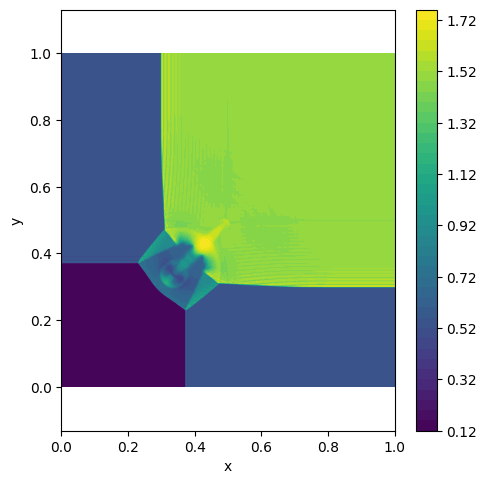

In [ ]:
X, Y = jnp.meshgrid(jnp.linspace(0,Lx,nx),jnp.linspace(0,Ly,ny),indexing='ij')
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, U[0], levels=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.tight_layout()
plt.axis('equal')
plt.show()